In [1]:
%load_ext autoreload
%autoreload
import pandas as pd
import seaborn as sns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
from sentiment import *
from datas import *
# make_sentiment_plt()

raw_df = raw_df()
df = clean_df()

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


# Harry Potter and the Actor's Dilemma

## Introduction

   In the movie industry, actors have to often choose between roles as production demands large amounts of time. Within a certain movie's universe, if one could estimate that given a character's screen time, agents and actors could better pick which roles to accept and take on. The assumption here is that each individual universe has their own "universe variables" to better predict screen times for actors. Starting actors who miss out on optimizing their screen time could be missing out on casting for later movies/shows that could result in a payout of millions. The type of model made below is tailored for the J.K Rowling's Harry Potter Universe, and presumably could be altered for other universes as well.
   

For those who are unfamiliar with the popular series, Harry Potter is a 7 book, 8 film series that made J.K Rowling one of the first billion dollar authors. The series follows a boy named Harry Potter who learns his abilities to do things no other humans can do makes him a wizard. Harry is then invited to join Hogwarts school of which-craft and wizardry and learns about the wizarding world and how to use his abilities. It is here that Harry learns that the mark on his head is from an all powerful dark wizard who killed his parents. Harry was somehow spared during this encounter with one of the most powerful wizards, something no one had accomplished. As the series progresses Harry, along with his friends, has to beat many versions of the dark lord (Voldemort/Tom Riddle) and face many of his accomplices.

## Data


   In the Harry Potter Universe we can create a linear model using data from within the universe to predict a character's screen time. The data used in the following model can be found at the following links:
   
   * Books - https://github.com/bradleyboehmke/harrypotter
   * Screen Times - https://www.imdb.com/list/ls027460372/
   * All other data - https://www.kaggle.com/gulsahdemiryurek/harry-potter-dataset
    
   One limitation of the book data is that it is scraped and includes page numbers and many of the beginnings of the chapters are corrupted. At the time of this study, page numbers are left intact within the text. It immediately causes complications to remove these, as there are other numbers in the books such as addresses, counts of items, train platforms, etc. The page numbers do not cause an issue for this study but could raise issues in later work.
   
   Other data limitations that should be noted is that the kaggle dataset is forum based and is not verified. The script within the kaggle dataset is scraped from a movie script website but this website is now shut down. The movie scripts did not seem readily available on the internet so no verification was done. There are several mis-spellings within the character dataset and most cannot be systematically repaired, upon joining on these datasets many of the names had to be manually changed from typo's or other names they use in the movies (ex. Tom Riddle\Voldemort -> Tom Riddle).
   
   The biggest data limitation overall is the limited number of characters after joining the datasets. The data from kaggle only contains the script of the first 3 movies. Within the movies, the majority of characters in the dataset do not come until after the 3rd movie. Once the movie script dataset is joined onto the character dataset most of the observations for this study are lost (we have inconclusive data). This is mainly due to when an actor goes to accept a role they are able to read the script first. The advantage of having this is that screen time is highly correlated with the amount of lines one has (this correlation is shown below in **methodology**).
        

## Methodology

Below is an ER-diagram to display what the joins of these datasets were and how the graphics in this report are made.

To explain the ER, the first  process to occur is that the books and the movie scripts are unioned together. This is being displayed on the right side of the diagram and the top left. From here we can join them together and produced a sentiment analysis graphic - this is displayed in the **Future Work** section. During this process a refined movie script dataset is created, in the code this is *script_v1*. For the books, code is written to search for our characters and count the number of times they are mentioned per chapter per book. This table is created and in code it is referred to as *mentions*. In order to get the regression data, the characters table is joined onto the script counts and joined onto screen times and joined onto character mentions.
These joins are done on the name of the characters, using a like and also joining on the correct movie. The mentions and script counts are aggregated up to the movie and book level. This is discussed below in the variable section.


<!-- 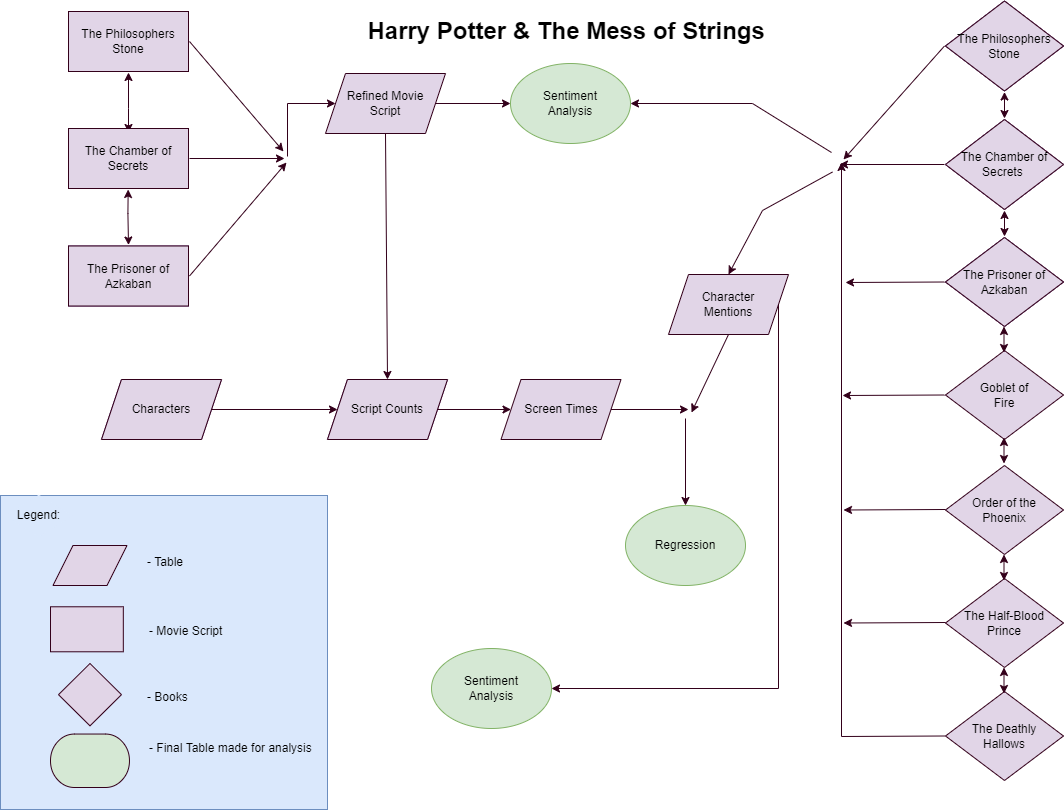  -->
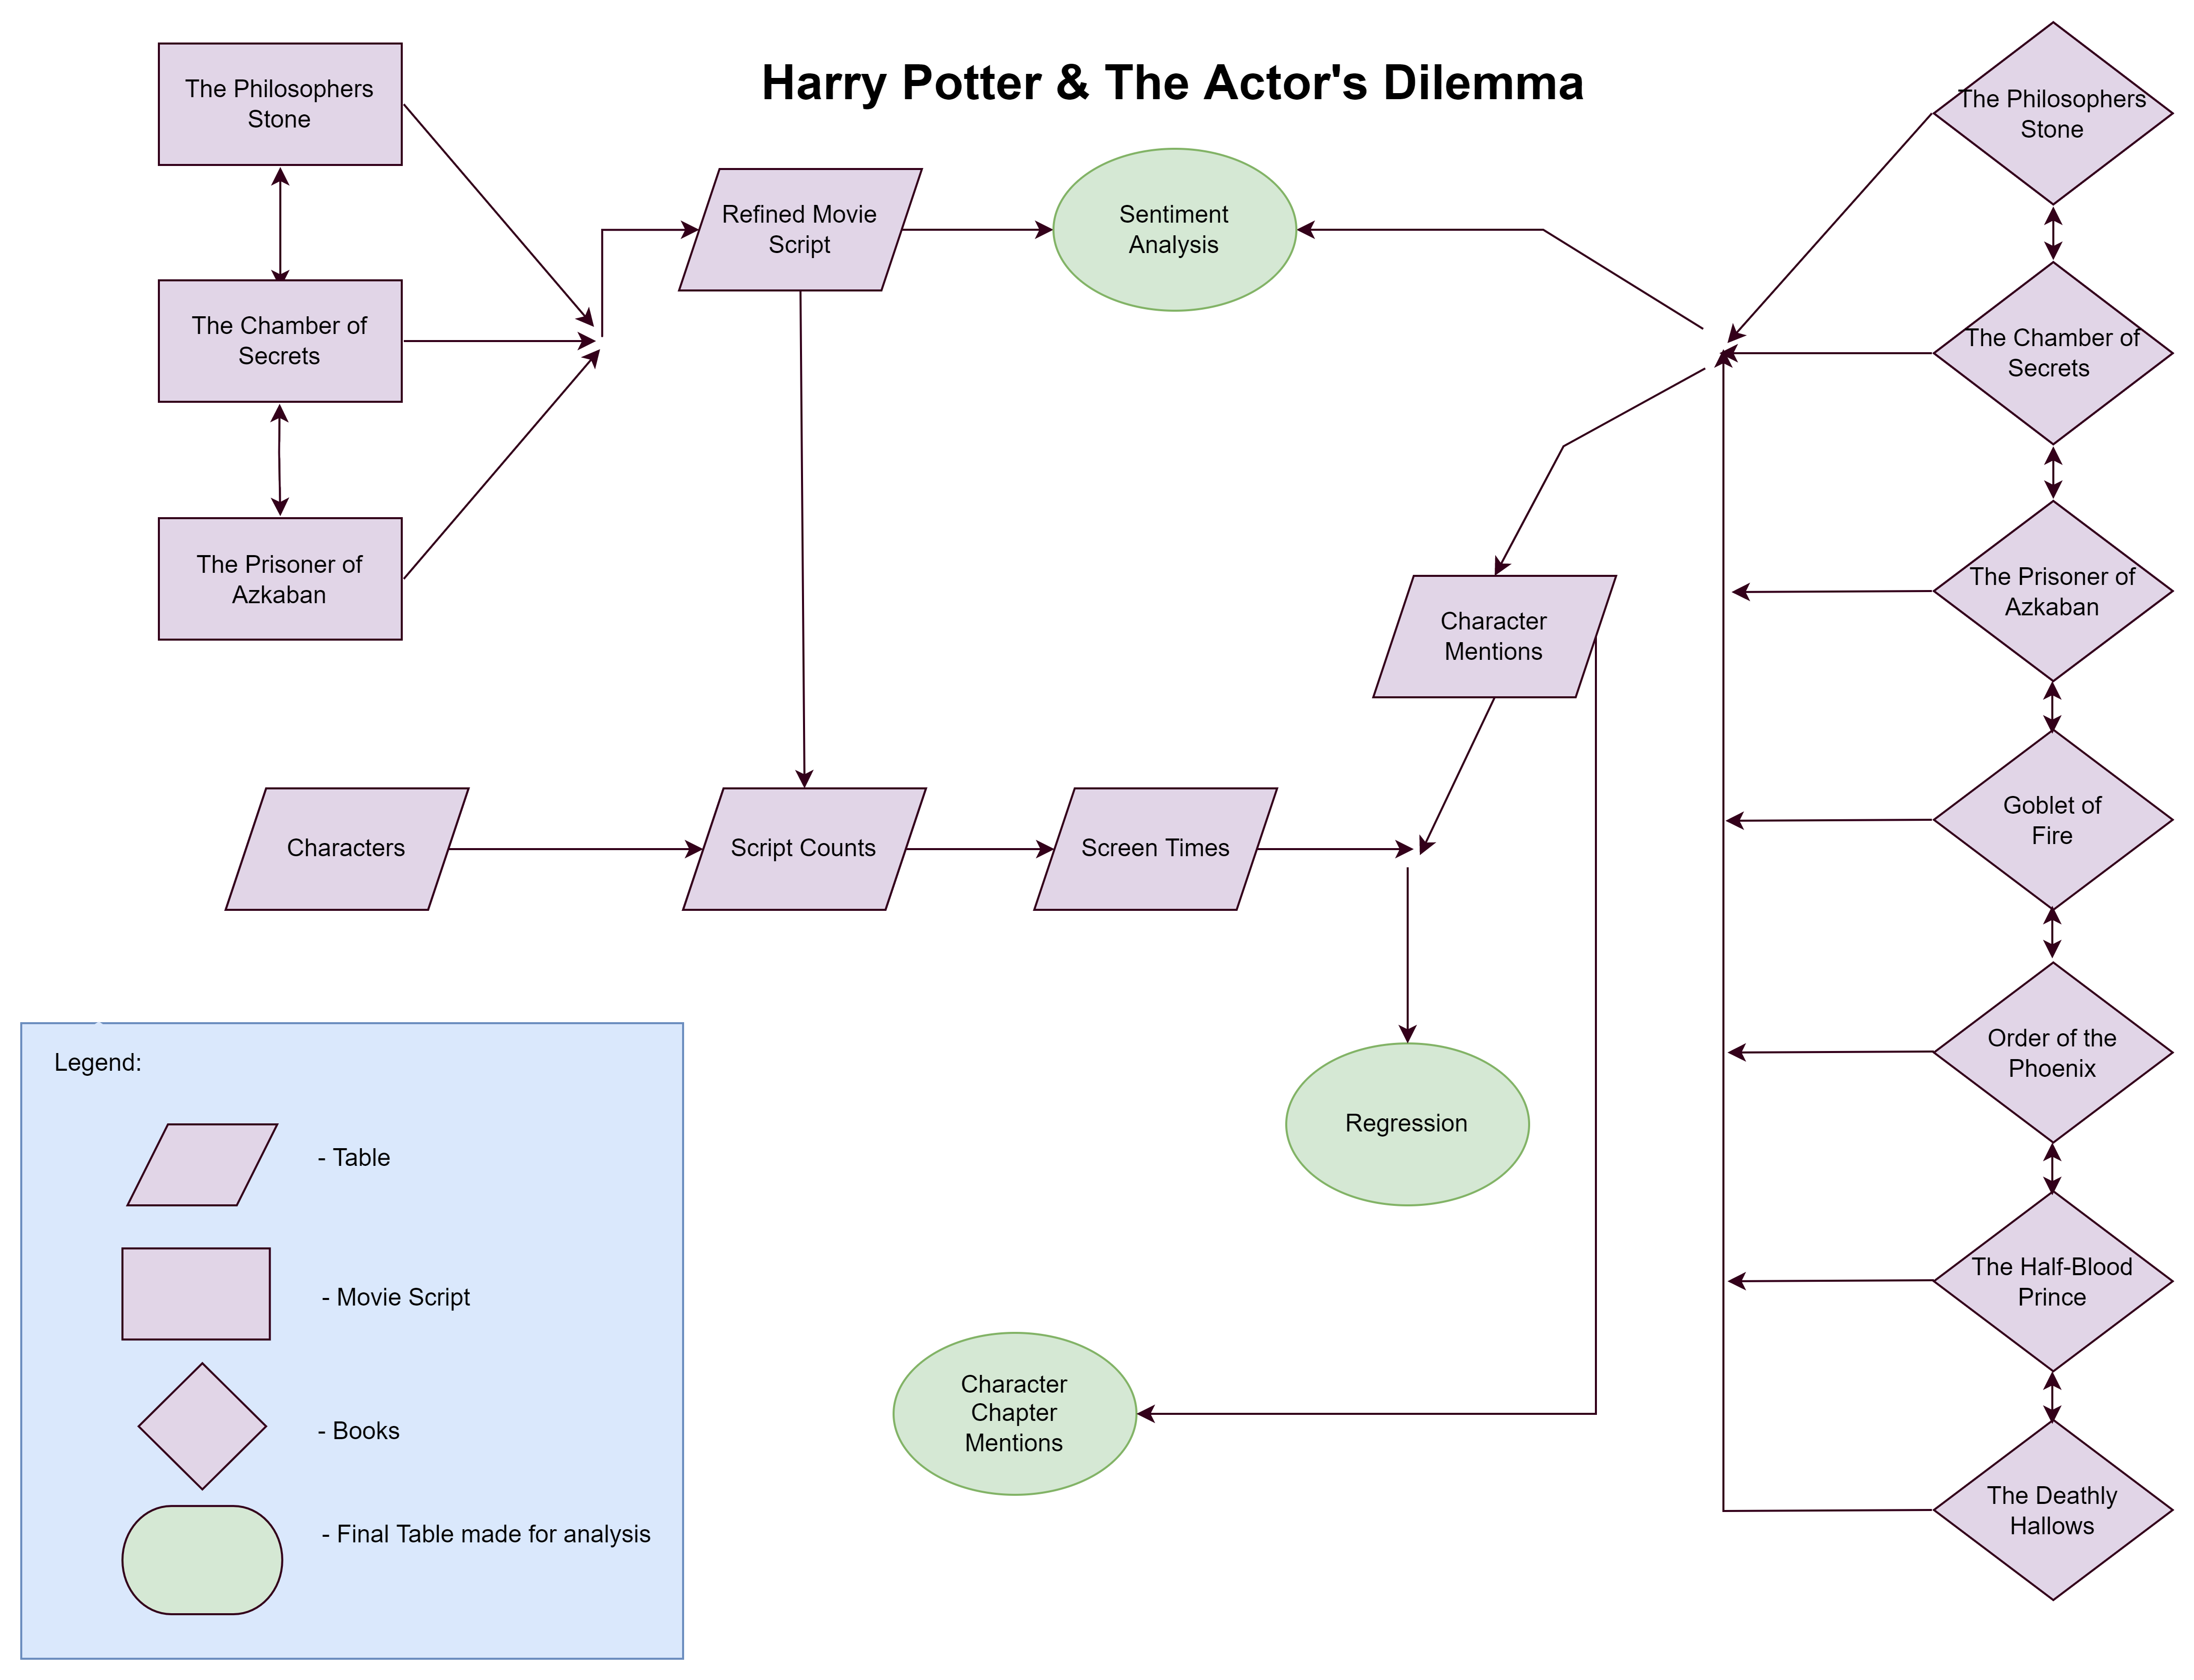
<!-- 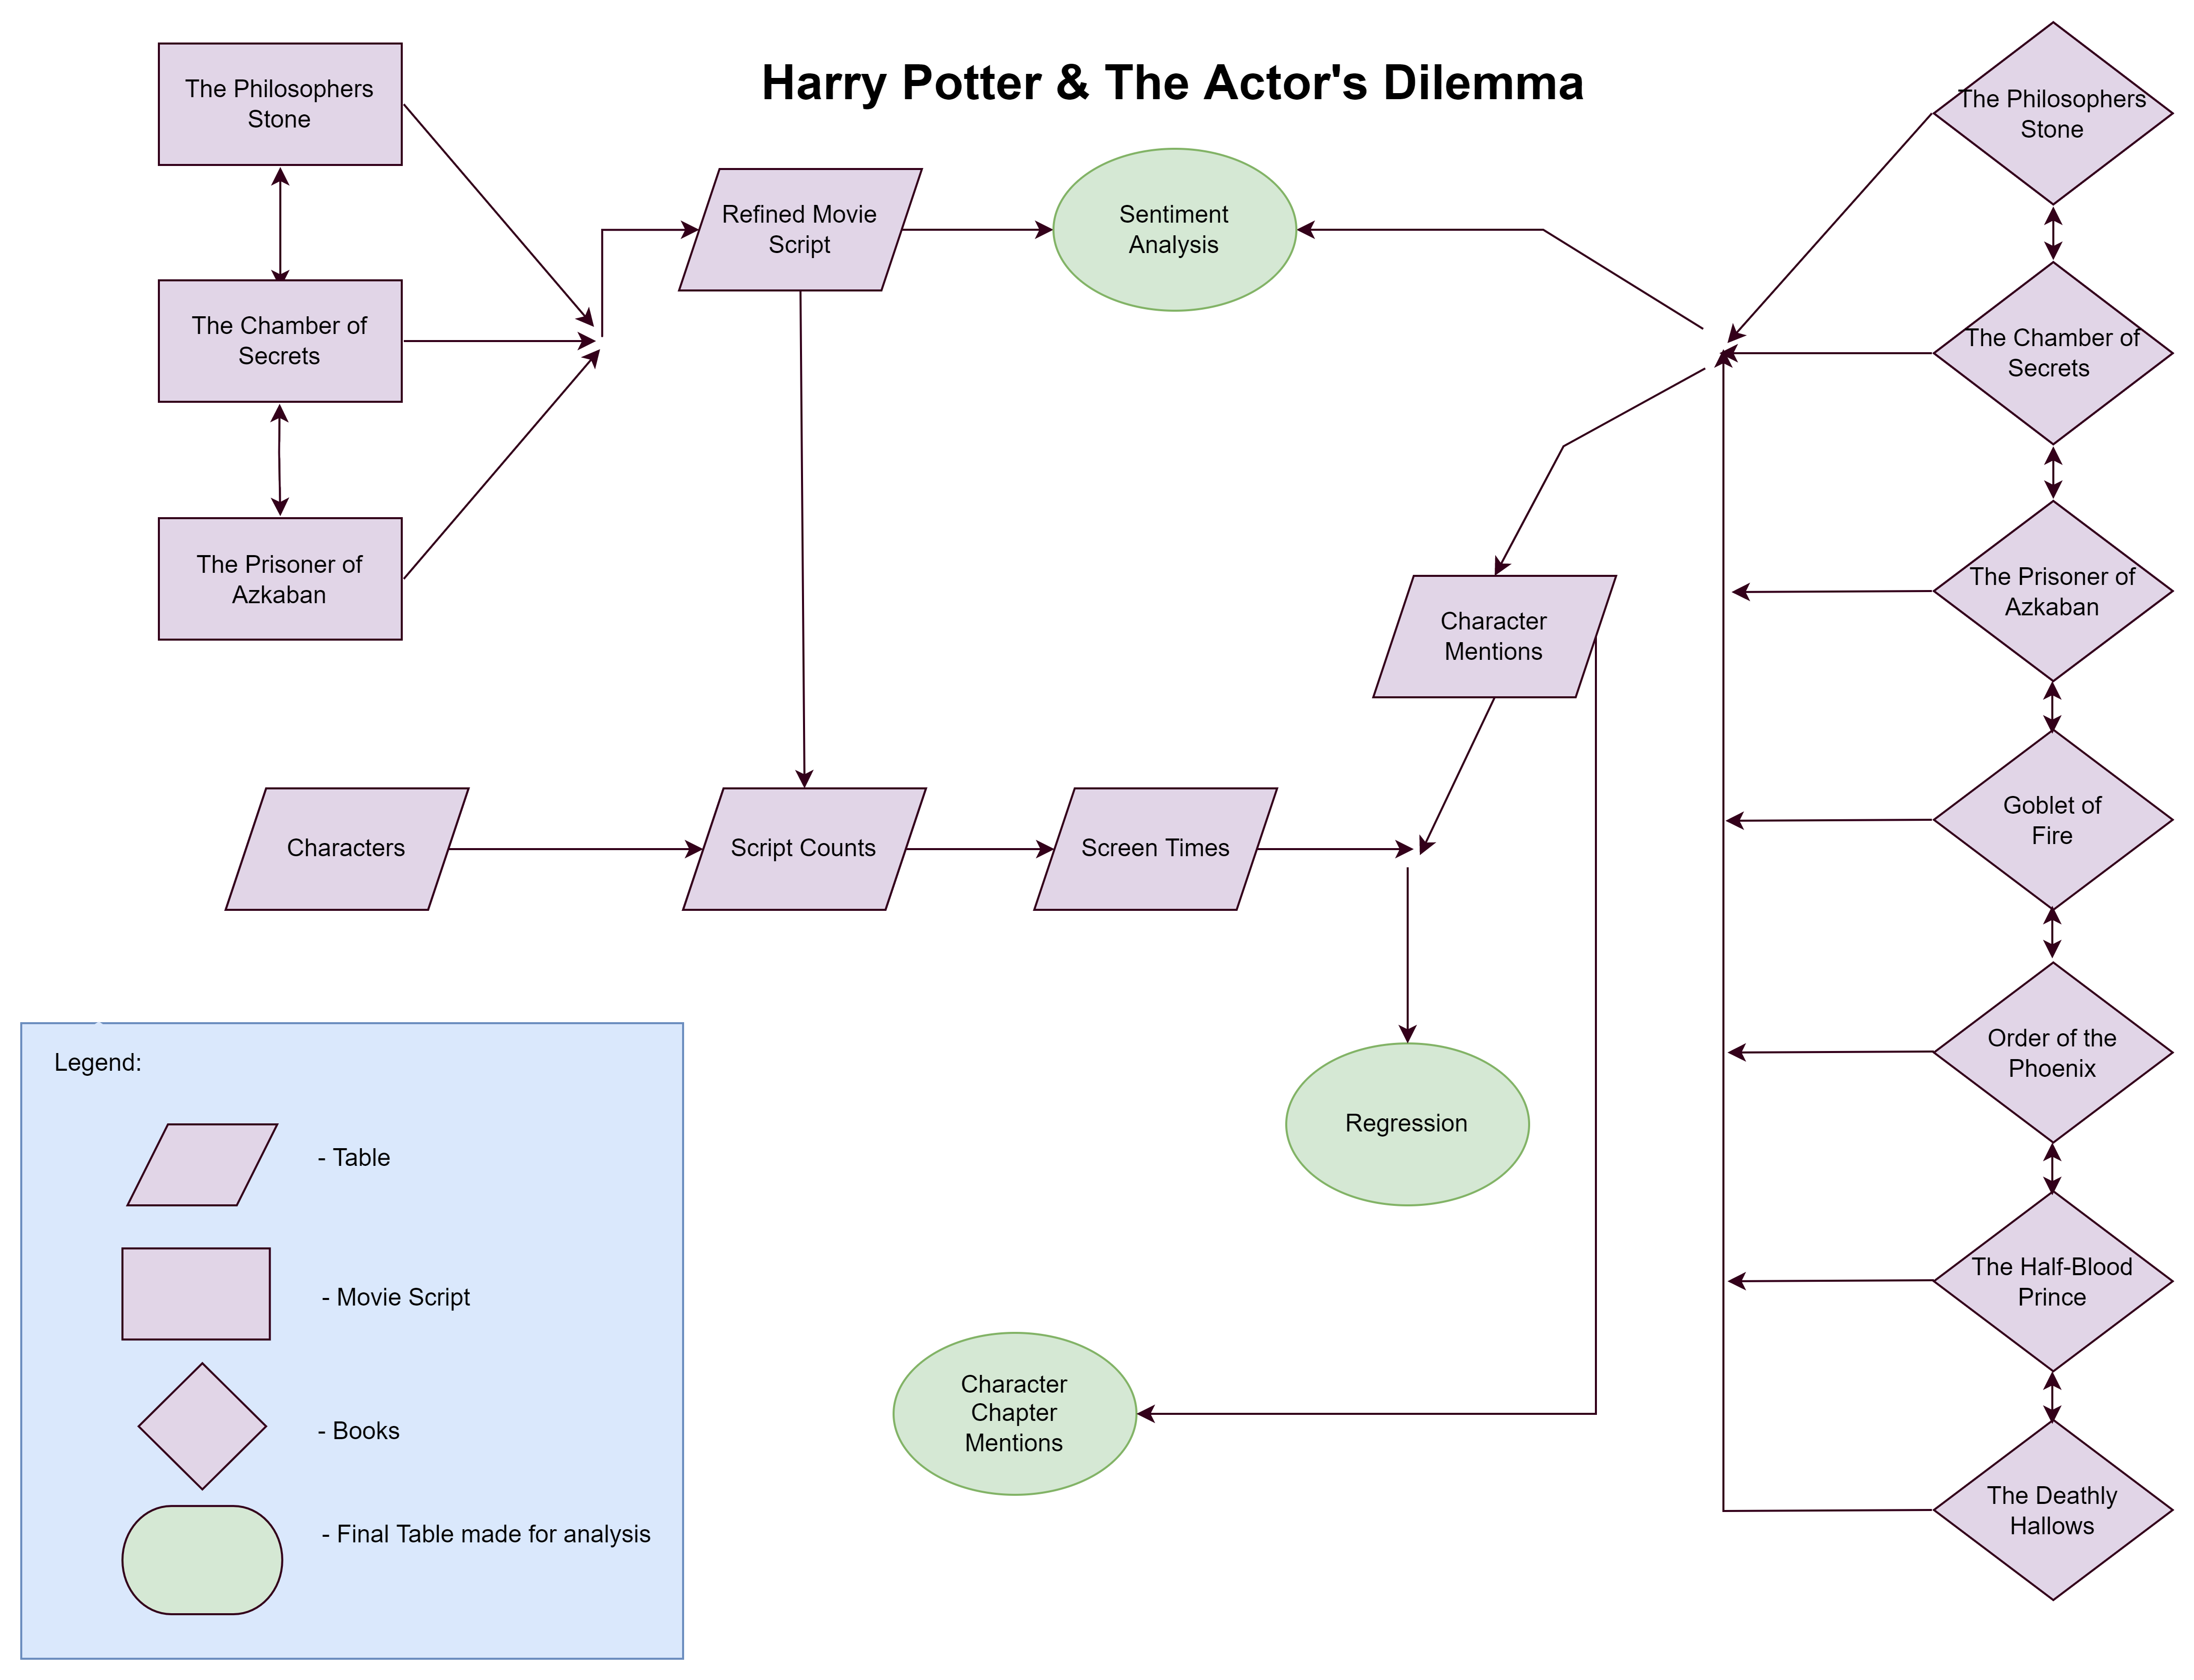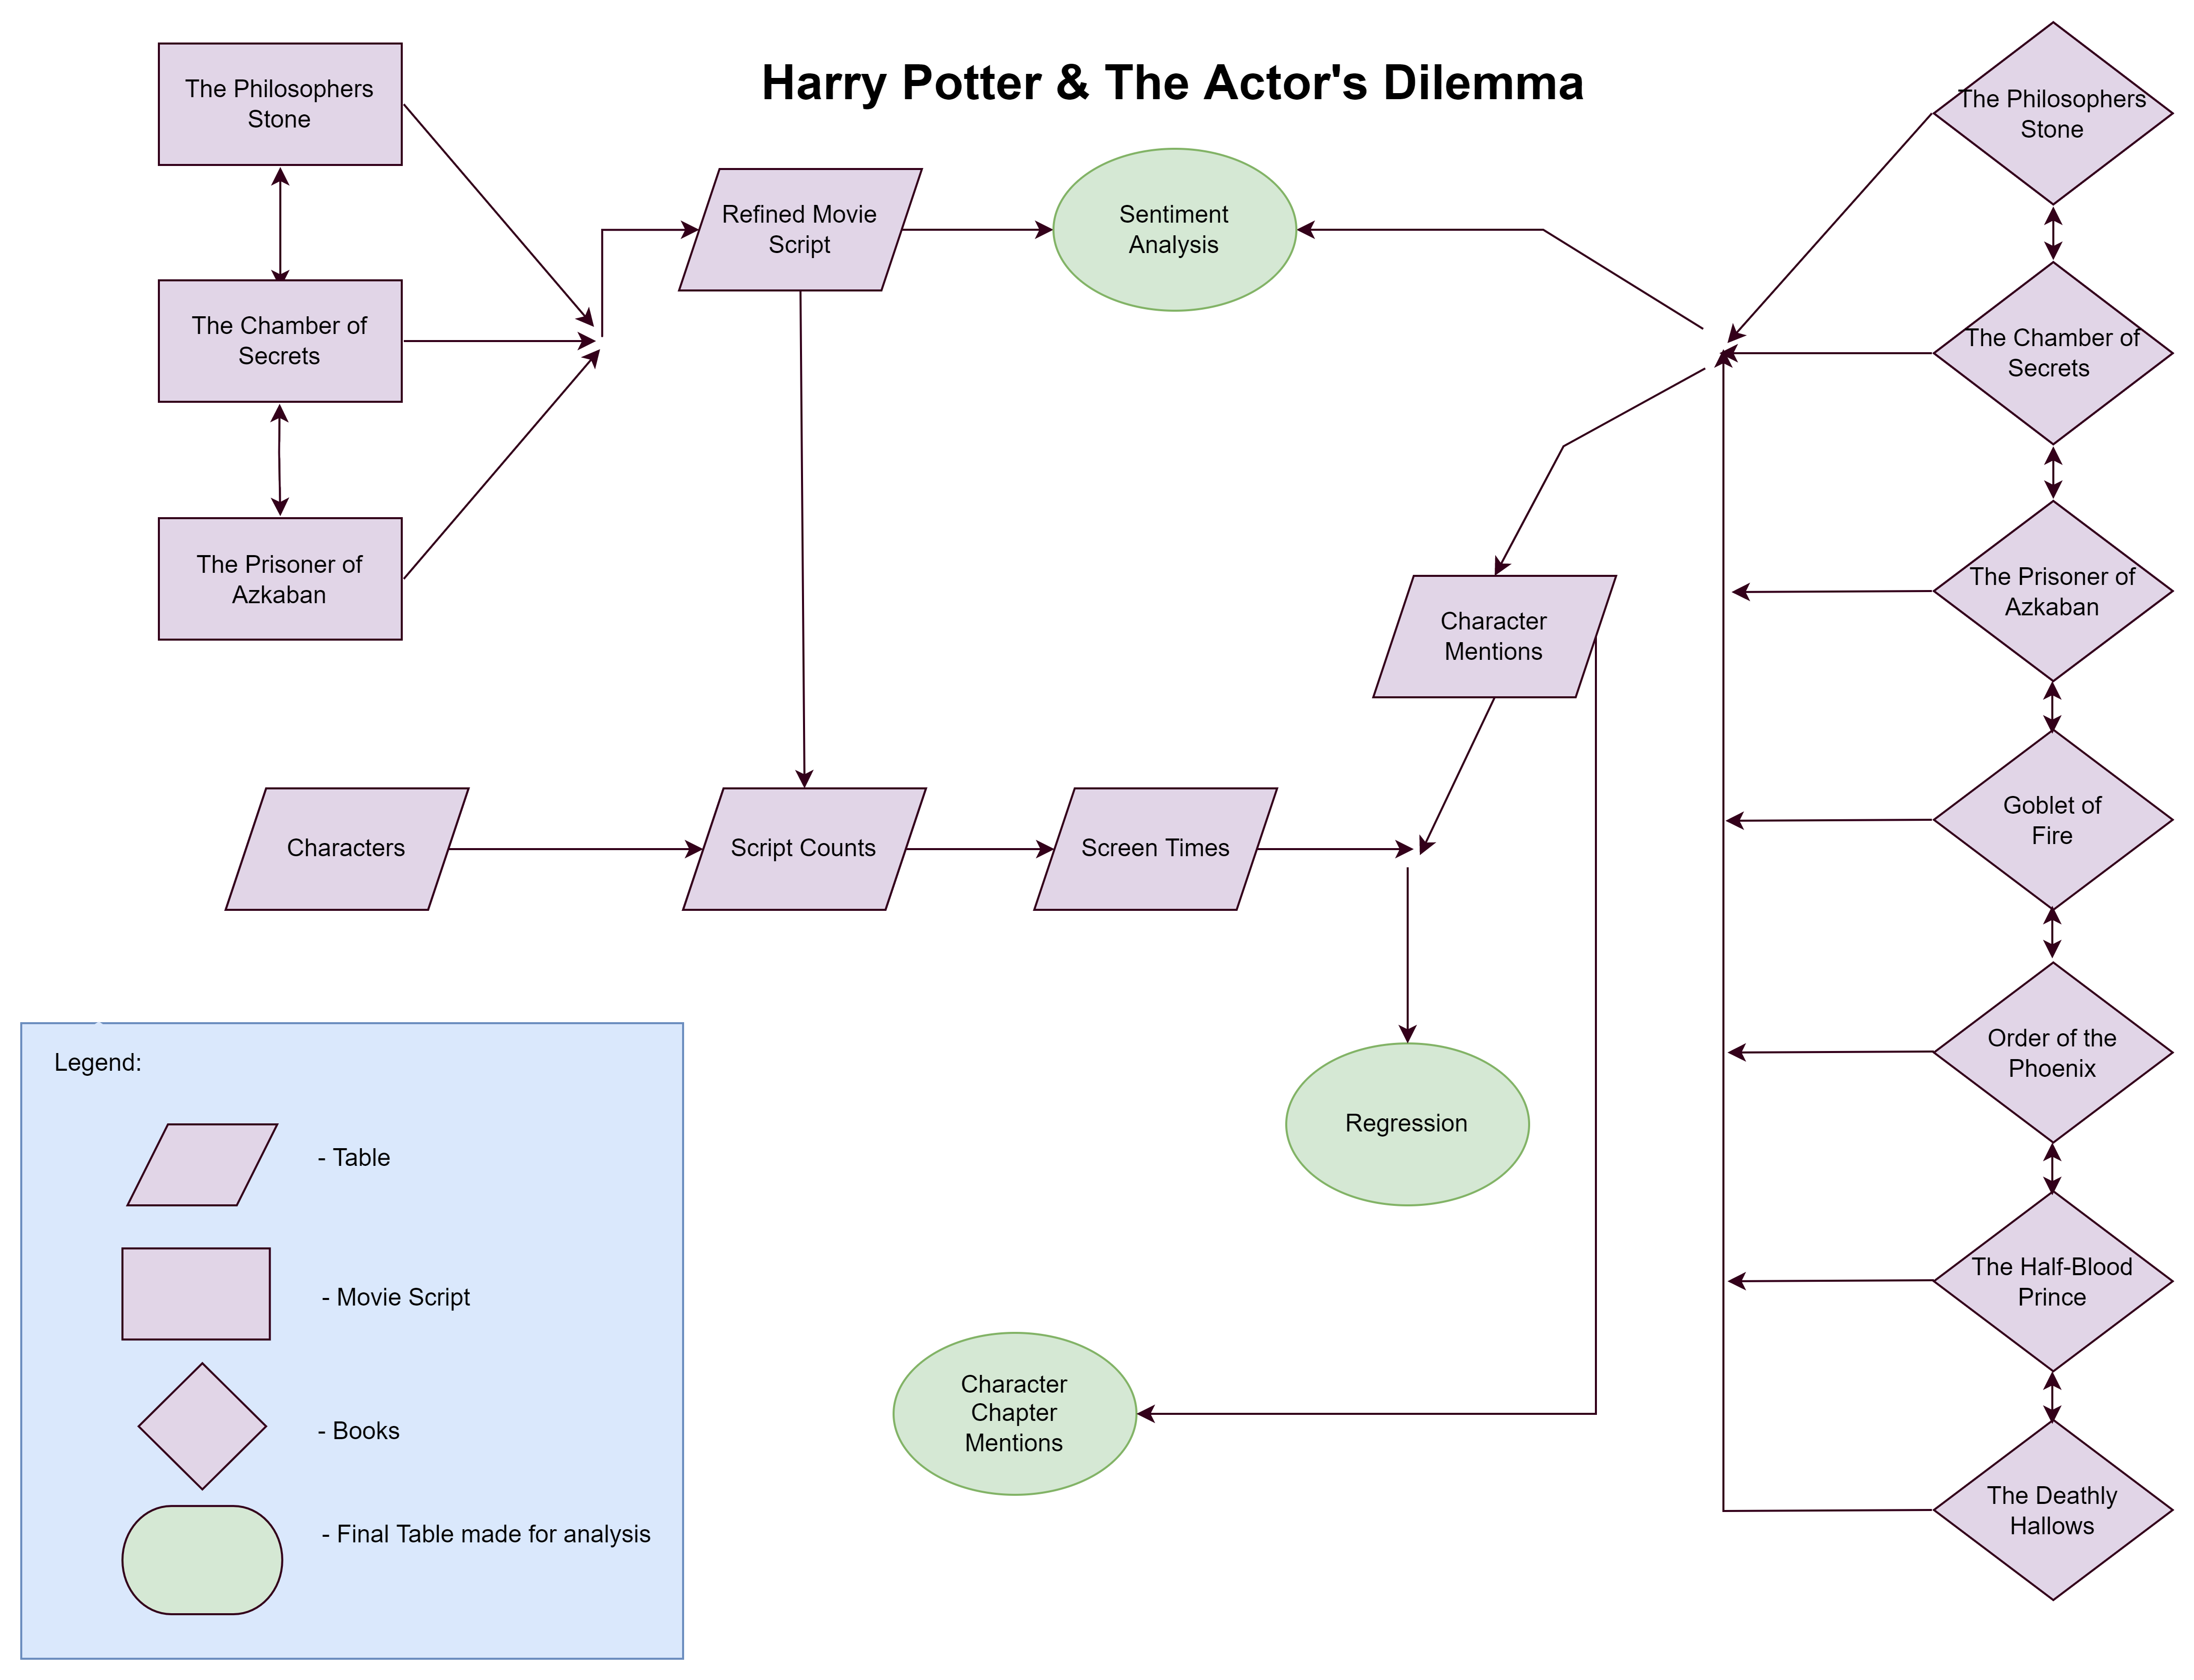 -->

A display of what the raw data from the regression join is below:

In [2]:
raw_df.sample(5)

Id             Name Gender                            Job       House  \
142   71     Sir Nicholas   Male         Gryffindor House Ghost  Gryffindor   
57   128     James Potter   Male                        Student  Gryffindor   
111   16  Peter Pettigrew   Male  The Servant of Lord Voldemort  Gryffindor   
21    47     Draco Malfoy   Male                        Student   Slytherin   
128    2      Ron Weasley   Male                        Student  Gryffindor   

                                Wand              Patronus Species  \
142                          Unknown               Unknown   Ghost   
57                           Unknown               Unknown  Human    
111  9¼" Chestnut dragon heartstring                  None   Human   
21         10" Hawthorn unicorn hair               Unknown   Human   
128       12" Ash unicorn tail hair   Jack Russell terrier   Human   

                 Blood_status             Hair_colour Eye_colour  \
142                      None                    Grey       None   
57                 Half-blood                    None       None   
111  Half-blood or pure-blood  Colourless and balding       Blue   
21                 Pure-blood             White-blond       Grey   
128                Pure-blood                     Red       Blue   

                                               Loyalty  \
142                                               None   
57                                                None   
111                       Lord Voldemort| Death Eaters   
21                                                None   
128  Dumbledore's Army | Order of the Phoenix | Hog...   

                                   Skills                             Birth  \
142                                  None                        1401 -1475   
57                                   None   1 September 2003-31 August 2004   
111                              Animagus  1 September 1959- 31 August 1960   
21                        Prefect, Seeker                      5 June, 1980   
128  Wizard chess | Quidditch goalkeeping                      1 March 1980   

                Death                               name_1  \
142  31 October, 1492  Sir Nicholas "Nearly-Headless Nick"   
57               None                         James Potter   
111   Late March 1998         "Scabbers" / Peter Pettigrew   
21               None                         Draco Malfoy   
128              None                          Ron Weasley   

                    book  avg_mentions  book_number     character  \
142   philosophers_stone      0.333333            1  Sir Nicholas   
57    chamber_of_secrets      2.263158            2          None   
111   chamber_of_secrets      0.000000            2          None   
21   prisoner_of_azkaban      2.924242            3         Draco   
128  prisoner_of_azkaban     13.060606            3           Ron   

     movie_number  script_counts         names  movie  screen_time_sec  
142           1.0            8.0  Sir Nicholas    1.0             45.0  
57            NaN            NaN          None    NaN              NaN  
111           NaN            NaN          None    NaN              NaN  
21            3.0           38.0  Draco Malfoy    3.0            240.0  
128           3.0          151.0   Ron Weasley    3.0           1275.0

### Variables
One can see that this data is not yet prepared for a model.

In this cell each of the columns will be discussed.

- ID: This is the characters id given by the kaggle dataset
- Name: -
- Gender: -
- Job: Detailed Job titles of each character
- House: At Hogwarts students are divided into 4 diffent classes or houses. 
    - These are based on character qualities one exibits or admires
- Wand: Description of their wand
- Patronus: The animal shape a certain spell takes on when casted.
- Species: Species of the character
- Blood_status: Some characters are half-blood, full blood or muggle.
    - Muggle just means human in this universe
- Hair_colour: - 
- Eye_colour: - 
- Loyalty: This is what faction throughout the movies they are loyal to.
- Skills: Certain wizard's have distinct skills compared to others.
- Birth: - 
- Death: - 
- Book: What book are we looking at for this character
    - Book_number: This is the same as book and they are the same as the movies
- Avg_mentions: As noted earlier this the average number of times that acharacter is referenced in the book.
- Script_counts: This is the number of times a person talks during the movie
- Screen_time_sec: The number of seconds a character gets screen time
 

For us to obtain a generalized model for the following columns are drop or edited:


- ID: This is random noise, we dont want the model being character specific.
- Name: Similar to ID, this column is left in for refernce (until the model).
- Job: There are many misspellings here and this column can easily be grouped together.
    - This columns includes many different professor jobs along with students
    - In this study, the following are grouped:
        - Students
        - Defence Against the Dark Arts Professor (D.A.D.A)
        - Other (includes all other professors)
    - D.A.D.A genrally play a different role in the movies and that is why they are grouped togeter
- Wand: These are distinct for each user and almost all values are missing.
- Patronus: These are distinct for each user(almost) and almost all values are missing.
- Hair_colour: This column is cleaned up, and a couple similar colors grouped.
- Eye_colour: This column is cleaned up, and a couple similar colors grouped.
- Loyalty: We should not care for this as many of the factions havent been determined.
- Skills: These identify characters
- Birth: This column is edited to extract the year each person was born. 
- Death: At the time we are looking into the model only a couple of characters have died. Many of which dont make it past the joins. 


One of the variables that should be explained in depth is the Avg_mentions variable. The variable is created by scanning each chapter for a character's first name, last name and both first and last. The average number of mentions is then taken from each chapter and then averaged up to the book level. A visual for the volatility in one's mentions is pictured below.


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


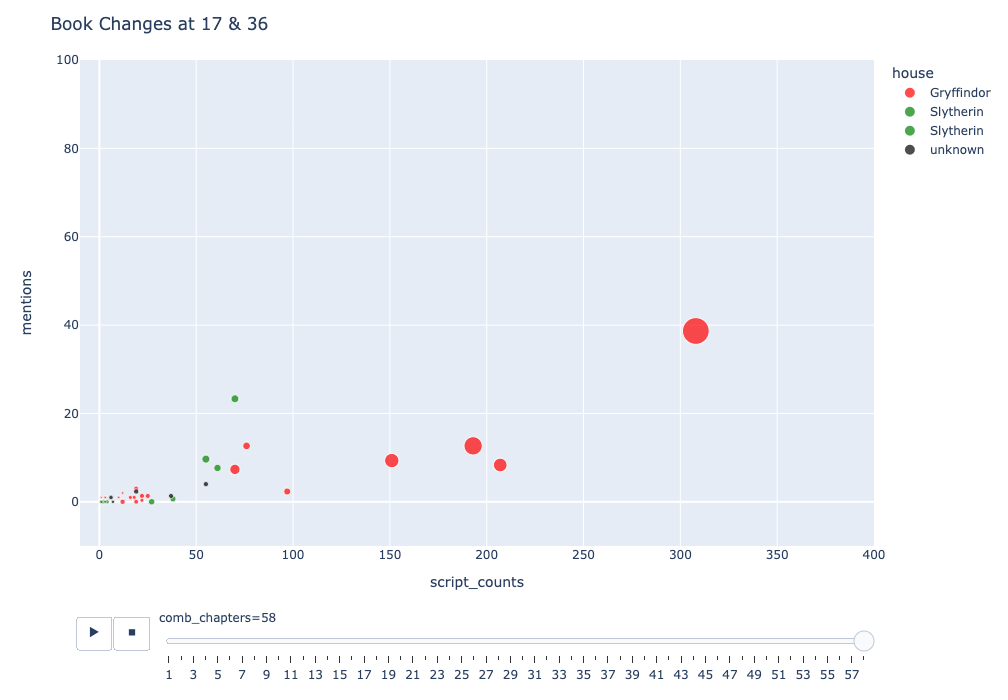

In [3]:
mentions_animation()

The animation above is sliding through each chapter of the first 3 books, the books change at numbers 17 and 36. The animation  is flexible allowing users to hover over data points and even zoom into the side characters.

Once the dataset is cleaned up, we can look at the column statistics. One might notice below that the mean of *birth_yr* seems to be a little low at 1950. This is due to the fact that wizards live long and the story takes place in the 90's, plus there is an outlier within our data. One character who made it through the *deathly joins* is Sir Nicholas, a ghost from the series. His birth is somewhere around the 1450's so in order for our pair plot to generate a better image, he will be queried out.

In [4]:
display(df.sample(5))
display(df.describe().round(2))

name  gender       house species  hair_colour eye_colour  \
72      Ron Weasley    Male  Gryffindor   Human          Red       Blue   
39    Lucius Malfoy    Male   Slytherin   Human  White-blond       Grey   
62  Petunia Dursley  Female     unknown  Human        Blonde    unknown   
60  Peter Pettigrew    Male  Gryffindor   Human         Bald       Blue   
24   George Weasley    Male  Gryffindor   Human          Red      Brown   

    avg_mentions  movie_number  script_counts  screen_time_sec job_grouped  \
72     10.078431           1.0          210.0           1695.0     student   
39      2.450980           1.0           36.0            255.0       other   
62      0.969697           3.0            6.0            135.0       other   
60      0.000000           3.0           19.0            150.0       other   
24      5.122807           2.0            3.0            150.0     student   

      blood_grouped  birth_yr  
72       Pure-blood      1980  
39       Pure-blood      1954  
62           Muggle      1960  
60  magic (unknown)      1960  
24       Pure-blood      1978

avg_mentions  movie_number  script_counts  screen_time_sec  birth_yr
count         92.00         92.00          92.00            92.00     92.00
mean           3.58          2.01          48.61           433.70   1950.38
std            5.78          0.81          74.87           880.59     79.19
min            0.00          1.00           1.00            15.00   1450.00
25%            0.63          1.00           7.00            75.00   1953.25
50%            1.91          2.00          19.50           150.00   1976.00
75%            3.61          3.00          55.00           322.50   1980.00
max           32.46          3.00         390.00          5025.00   1981.00

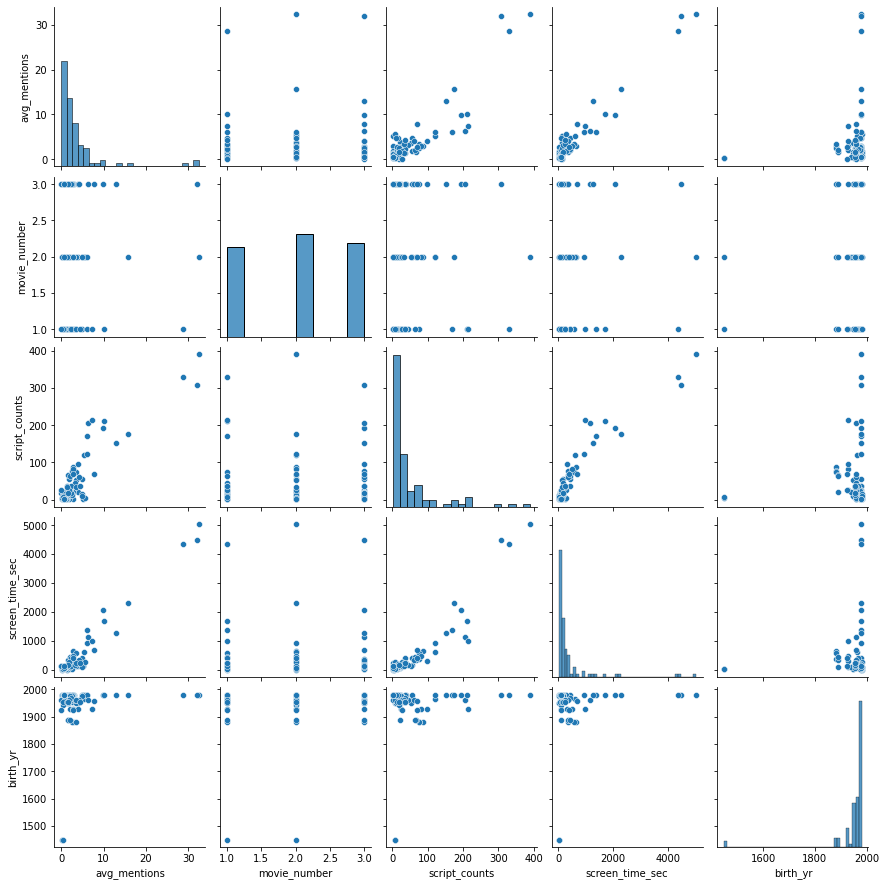

In [8]:
#including Nicholas
sns.pairplot(df)

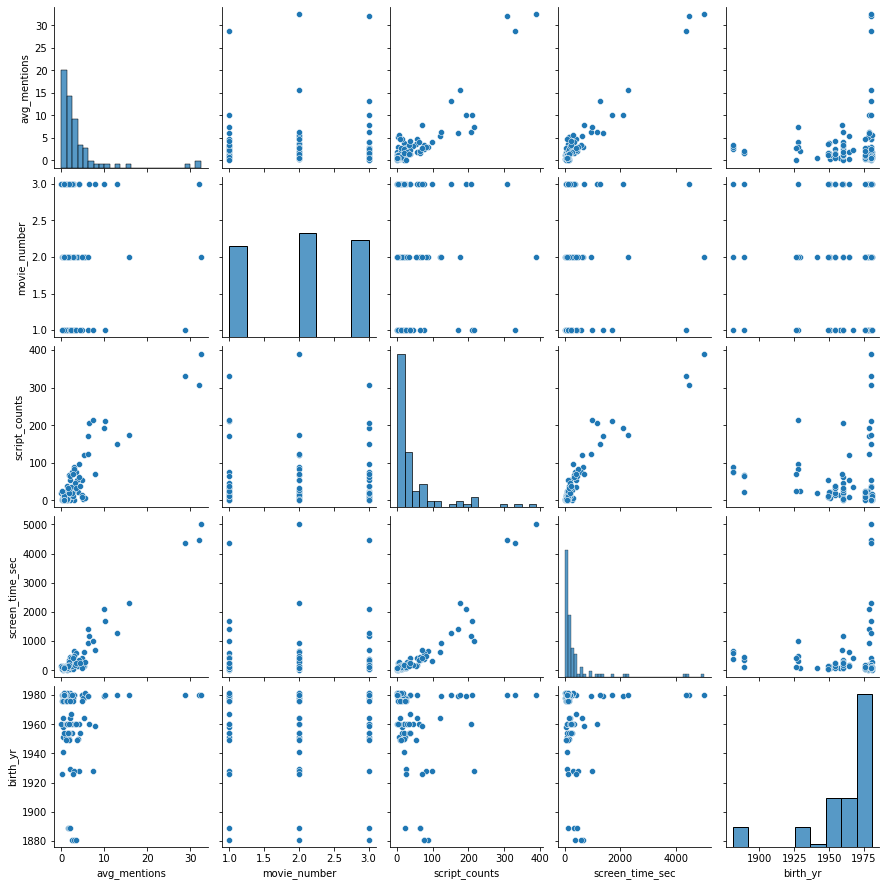

In [5]:
#Excluding Nicholas
sns.pairplot(df.query("name != 'Sir Nicholas'"))

Now the age outliers are Dumbledor(The Headmaster of Hogwarts) and McGonagall(a professor).

From here it notible that we do have correlation between screen time, script counts and book mentions. We want to keep these highly correlated variables in the model since often when a film is adapted from the books, some characters are over represented or some are even created to assist the movie.

## Model

This data is then exported to R studio where the linear model is built. The following model is 


$screen time sec  = \beta + \beta_1 Avg Mentions + \beta_2 Movie Number + \beta_3 Gender + \beta_4 House + \beta_5 Species + \beta_6 Hair Color + \beta_7 Eye Color + $
$\beta_8 Script Counts + \beta_9 Job Grouped + \beta_{10} Blood Grouped + \beta_{11} Birth Year$

After statistically evaluating each of these variables and distinct grouping the following model is considered the final.

$${screen time sec}^{1/3} = 4.64 + .12 Avg Mentions - 1.06 Not Human/Species + 1.60 Blonde/HairColor + .12 Other/Hair Color $$ $$- .83 Green/Pale/Brown/Eye Color -.46 Unknown/Eye Color +.028 Script Counts$$

The reference level for the model above is a Human with Dark/Black hair with Blue/Dark eyes. These grouping of varibles was done in a way such that we dont lose significant infromation from the model. 
Below are graphics of evidence the errors from the model are normal and the variance is constant

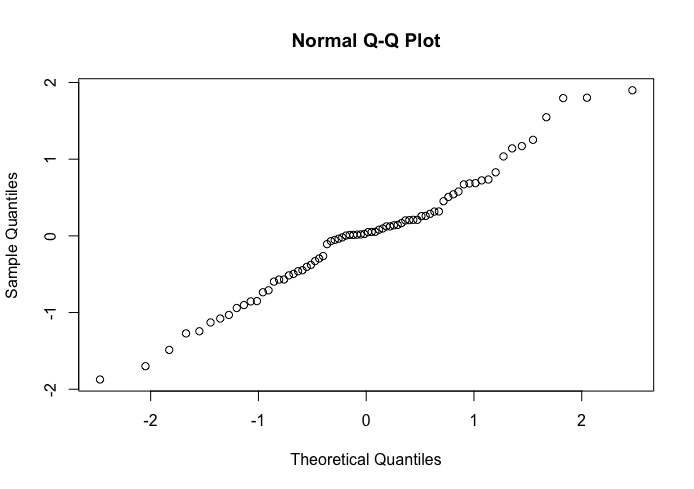

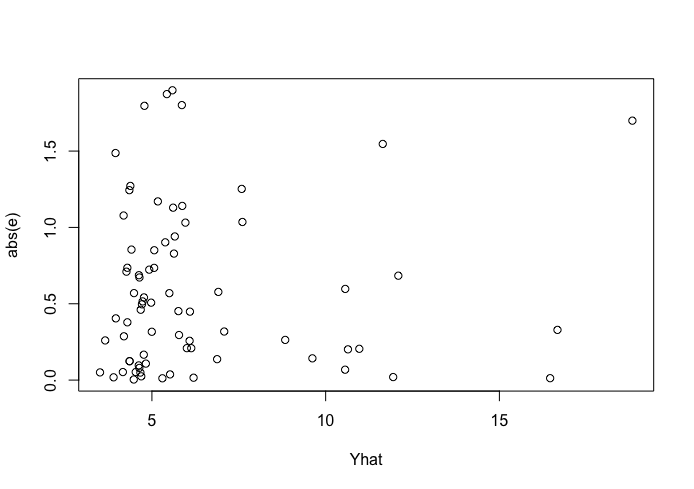

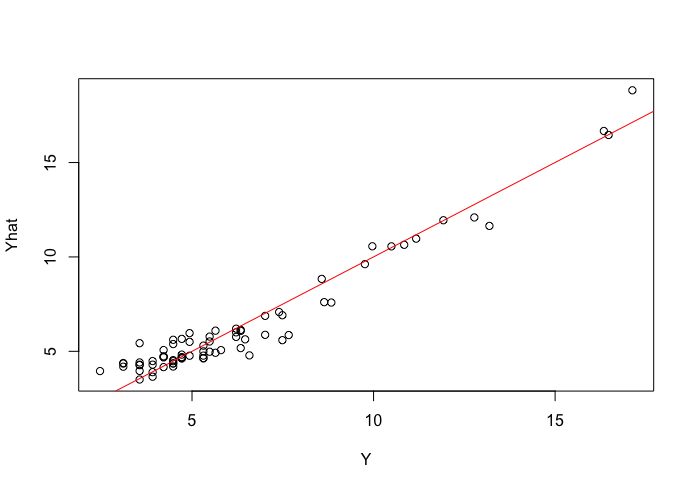

The last graphic above is Yhat on Y, and how well our model estimates screen times. We can then add in our validation data to this graphic and observe how the predicted values do. Below the red values are data from the predicted Y validation on the actual Y validation (screen time in seconds).

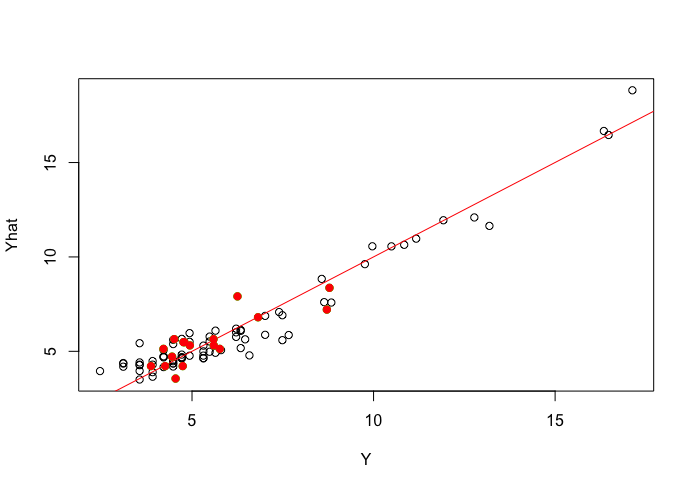

In comparison with the original model, our reduced model gets a cross validaton root mean square prediction error of 0.11 where the original model has an average of 0.13. So the reduction and grouping of the variables does improve the overall model.


### Model Discussion 
In order for this model to follow the assumptions that the variance is constant, screen time had to be transformed. This is due to the main characters having a significantly more screen time than the rest of the cast. This then really does show how significant the .2 difference on the RMSEP, since the cubic root of screen time in seconds is used.

It should be noted that hair color and eye colors play significant roles in the model. Here the data is based on the books, but in movies they vary. Realistically eye color doesnt matter for real-world application as an actor casted for a role isn't dependent on eye color. Hair color in this sense does play significance as the blonde hair falls into a family that plays a side role in the series - the Malfoys. Human plays a significance since the series is based on human wizards. Characters who are not human play side roles and that's why being casted as Not-human decreases your overall screen time.

## Conclusion 

As stated above, this model is based on 92 observations. To trust the model, it would be wise to expand the dataset from just the first 3 movies. Our data being limited, greatly hinders the model and thus complicates it to predict other characters screen times in the following movies. However, the true basis of the model comes from average mentions and script counts. This is fairly intuitive, as a character who talks more and is talked about more will play significant roles within the series. The fact that we have two distinct variables that account for the book and the movie make this model flexible in that some characters are over/under represented when it comes to transitioning a book into a movie.

The application from this model is that an actor looking to taking a side role, will know approximately how much screen time they should expect. One example of the importance of an actor's screen time is in the case of Harry Melling (Dudley Dursley). His net worth accumulated to over 2 million in the course of these 8 films. His screen time is minimal and he is a side character who only shows at the beginning of the movies and books. Melling then was casted as a main character in the series *The Queen's Gambit*. After his work there and the series becoming one of the highest grossing in netflix history, Melling's net worth increased by a million.

A question to contemplate is that, was he casted because of his screen time on Harry Potter, or for other reasons? Melling's biggest work was on Harry Potter so it is likely that the arrogant attitude he displays in the series is what landed him a much larger role as an arrogant chess player in *The Queen's Gambit*. At the time of Harry Potter, Melling didn't have any other film pursuits so he stayed with Harry Potter. Perhaps when actors are faced with ultimatum role opportunities these types of models should be considered. A million dollar mistake could be a hand.


## Future Work
   An interesting further step with this model is to evaluate other movie series and franchises and make multiple models and compare them to each other. A Series such as *Game of Thrones* is book based as well, and models could be created for that universe. Could this Harry Potter model simply generalize to other franchises? Along with this there are several other models that should be tried on this data before continuing on to a generalized screen time model.
   
   Another potential for this project is that during research of the "potter verse" there are some interesting discussions that claim J.K Rowling did not write the entire series. The synopsis is that after about the 3rd book of the series (Harry Potter and The Prisoner of Azkaban), she was aided heavily by ghost writers as she was able to produce books within a year. Many speculate that writing styles and the themes and tones of the later books vastly contradict the first. This thought can be seen at the link below:
https://www.breezejmu.org/opinion/conspiracy---fact-or-fiction-j-k-rowling-s-swift-rise-to-fame/article_dd38aee4-c9f1-11e9-bbfb-07a0f1187d59.html

An anecdotal proof for this would be to fine tune a Google's BERT and then classify whether Rowling wrote a book or did not. An introduction into this is sentiment analysis of the books. Below is a graphic displaying Textblob’s sentiment analysis of the book sentence by sentence.  Interesting to note that through the books the graph does not seem to change much, and the movies follow a similar path as well.


/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/opt/conda/lib/python3.7/site-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



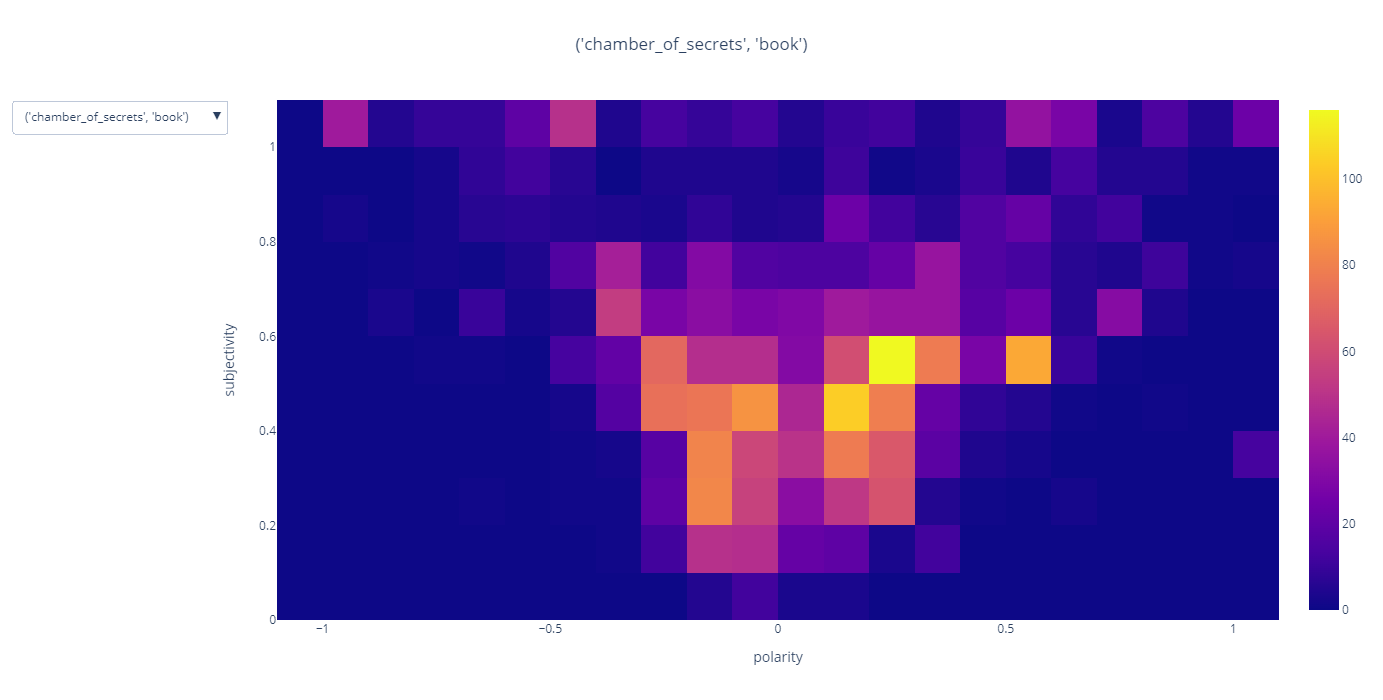

In [6]:
make_sentiment_plt()

## R Studio Code for Linear Model

#Final Project


#import fuctions
###################################################################
f.test=function(model0,model){
  e02=sum((model0$residuals)^2)   #Residual sum of squares for small model.
  e2=sum((model$residuals)^2)     #Residual sum of squares for big model.
  df0=model0$df.residual          #Residual degrees of freedom for small model.
  df=model$df.residual            #Residual degrees of freedom for big model.
  f.stat=((e02-e2)/(df0-df))/(e2/df)
  p.value=pf(f.stat,
             df1=df0-df,
             df2=df,
             lower.tail=FALSE)
  return(list(f.stat=f.stat,p.value=p.value))
}
########################################################################
#Brown Forsythe Test
#
#e is a vector of residuals, and x is some vector
#(usually yhat or one of the x_j's)
brown.forsythe=function(e,x){
  m=median(x)
  e1=e[x<=m]
  e2=e[x>m]
  e1med=median(e1)
  e2med=median(e2)
  d1=abs(e1-e1med)
  d2=abs(e2-e2med)
  d1bar=mean(d1)
  d2bar=mean(d2)
  n1=length(e1)
  n2=length(e2)
  sp=sqrt((sum((d1-d1bar)^2)+sum((d2-d2bar)^2))/(n1+n2-2))
  t=(d1bar-d2bar)/(sp*sqrt(1/n1+1/n2))
  return(2*pt(abs(t),n1+n2-2,lower.tail=FALSE))
}

box.cox=function(Y,X,lambdarange){
  n=length(Y)
  K2=(prod(Y^(1/n)))
  L=length(lambdarange)
  SSE=1:L
  for(l in 1:L){
    lambda=lambdarange[l]
    K1=1/(lambda*K2^(lambda-1))
    if(lambda==0){W=K2*log(Y)}
    if(lambda!=0){W=K1*(Y^lambda-1)}
    tempmodel=lm(W~X)
    SSE[l]=deviance(tempmodel)
  }
  i=(sort(SSE,index.return=TRUE)$ix)[1]
  return(lambdarange[i])
}

#############################################################


#import data
hp = hp_regression
set.seed(32)

# it is noted that our movie number comes in as a float  we would like it 
# to be a string

hp$movie_number <- as.character(hp$movie_number)

rand_samp_test = sample(nrow(hp), round(nrow(hp) * .80), replace = F)

rand_samp_valid = setdiff(1:92, rand_samp_test)

Y = hp[rand_samp_test,]$screen_time_sec
X = hp[rand_samp_test, 3:13]
Y_valid = hp[rand_samp_valid,]$screen_time_sec
X_valid = hp[rand_samp_valid, 3:13]


model = lm(Y~.,data=X)
summary(model)


Yhat=predict(model)
e=residuals(model)
summary(model)
brown.forsythe(e,Yhat)

Y <- Y^(1/3) # transform Y 
#after looking at the model summary, one can see 2 humans for the species type
#we need to change this.

sp = as.factor(X$species)
levels(sp)
spec = c("Ghost","Half-Human/Half-Giant","Human","Human","Human(goblin ancestry)",
       "Werewolf")[sp]
X$species = spec
model = lm(Y~.,data=X)
summary(model)
#this seems to make no difference.
big_model = lm(lm(Y~.,data=X))





# one can see several of the varibles were not further grouped in python to
#leave this data in a generalized state. From the model summary we can further
#Lets leave out blood type
X1 <- subset(X, select = - c(blood_grouped))

model0 = lm(Y~.,data=X1)
summary(model0)
f.test(model0,model)

#fail to reject null we  can leave blood_type out
X = X1
model = lm(Y~.,data=X)

X1 <- subset(X, select = - c(eye_colour))

model0 = lm(Y~.,data=X1)
summary(model0)
f.test(model0,model)


#look in to gender and movie number
X1 <- subset(X, select = - c(gender,movie_number))

model0 = lm(Y~.,data=X1)
summary(model0)
f.test(model0,model)


#we can leave out gender and movie number
X = X1
model = lm(Y~.,data=X)
summary(model)


#

######################
# for hair
# earlier there was a small significance for the hair color red
# this is possibly due to a family in the series has red hair and they
# play a significant side role in the series 
# lets start by grouping into other and red.

hair_color = as.factor(X$hair_colour)
levels(hair_color)
hc = c("Other","Black-Dark","Other","Blonde","Black-Dark","Other",
       "Other","Other","Other", "Other","Other","Other")[hair_color]

hcX = X
hcX$hair_colour = hc
hcX$hair_colour
#after grouping the hair lets look back at the model

hcmodel = lm(Y~.,data=hcX)
summary(hcmodel)
f.test(hcmodel, model)

model = hcmodel
X = hcX

#Lets leave out eye color 
X1 <- subset(X, select = - c(eye_colour))

model0 = lm(Y~.,data=X1)
summary(model0)
f.test(model0,model)

# we reject the null eye_colour and blood type does statistically matter

#Lets further group these 
eye = as.factor(X$eye_colour)
table(eye)
levels(eye)

#want to group scarlet grey, pale and black

ec = c("Asstd.","Blue", "Brown", "Asstd.", "Green","Asstd.","Pale","Asstd.","Unknown")[eye]
X1 = X
X1$eye_colour = ec

X1$eye_colour
#after grouping the hair lets look back at the model

model0 = lm(Y~.,data=X1)
summary(model0)
summary(model)
f.test(model0, model)

model = model0
X = X1
#############################################################################
#############################################################################
#############################################################################

X1 <- subset(X, select = - c(species))

model0 = lm(Y~.,data=X1)
summary(model0)
f.test(model0,model)
#species is significant

spec = as.factor(X$species)
table(spec)
levels(spec)

#want to group human and non-human

ec = c("Not-Human","Not-Human","Human","Not-Human","Human" )[spec]
X1 = X
X1$species = ec
#after grouping the hair lets look back at the model

model0 = lm(Y~.,data=X1)
summary(model0)
summary(model)
f.test(model0, model)
#grouped
X=X1
model= model0


#looking into job
X1 <- subset(X, select = - c(job_grouped))

model0 = lm(Y~.,data=X1)
summary(model0)
f.test(model0,model)

#we reject null we dont need job

X = X1
model=model0
summary(model)


X1 <- subset(X, select = - c(birth_yr))

model0 = lm(Y~.,data=X1)
summary(model0)
f.test(model0,model)
# dont need birth year
X = X1
model=model0

#############################################################################
#############################################################################
#############################################################################
#############################################################################

X1 <- subset(X, select = - c(house))

model0 = lm(Y~.,data=X1)
summary(model0)
f.test(model0,model)
# dont need houses
model = model0
X = X1

#####################################################3
summary(model)

eye = as.factor(X$eye_colour)
table(eye)
levels(eye)
ec = c("Blue-Dark","Blue-Dark","Brown-Green-Pale","Brown-Green-Pale","Brown-Green-Pale","Unknown")[eye]
X1 = X
X1$eye_colour = ec
#

model0 = lm(Y~.,data=X1)
summary(model0)
summary(model)
f.test(model0, model)

model = model0
X = X1
summary(model)


summary(model)

Yhat=predict(model)
e=residuals(model)

plot(Yhat,abs(e))


plot(Yhat,Y)
lines(c(0,2*10^6),c(0,2*10^6),col="red")

plot(Yhat,e)

qqnorm(e)

shapiro.test(e)
#fail to reject, evidence o normality
brown.forsythe(e,Yhat)
#fail to reject

###########################################################################
##########################################################################
#need to apply all transformations to the x and y data that we have done 
#above.


Y_valid = Y_valid^(1/3)

big_X_Valid = X_valid

sp = as.factor(X_valid$species)
levels(sp)
spec = c("Ghost","Half-Human/Half-Giant","Human","Human","Human(goblin ancestry)",
         "Werewolf")[sp]
X_valid$species = spec

hair_color = as.factor(X_valid$hair_colour)

hc = c("Other","Black-Dark","Other","Blonde","Black-Dark","Other",
       "Other","Other","Other", "Other","Other","Other")[hair_color]
X_valid$hair_colour = hc

spec = as.factor(X_valid$species)

ec = c("Not-Human","Not-Human","Human","Not-Human","Human" )[spec]
X_valid$species = ec

eye = as.factor(X_valid$eye_colour)

ec = c("Blue-Dark","Blue-Dark","Brown-Green-Pale","Brown-Green-Pale","Brown-Green-Pale","Unknown")[eye]
X_valid$eye_colour = ec
X_V <- subset(X_valid, select = - c(house, job_grouped,movie_number, blood_grouped,birth_yr,
                             gender))

sp = as.factor(big_X_Valid$species)
levels(sp)
spec = c("Ghost","Half-Human/Half-Giant","Human","Human","Human(goblin ancestry)",
         "Werewolf")[sp]
big_X_Valid$species = spec
#Predictions for the big model
predY=predict.lm(model,newdata=X_V)
predbigY=predict.lm(big_model,newdata=big_X_Valid)

#Root mean square prediction error for the big model:
sqrt(1/1000*sum((Y_valid-predY)^2))
sqrt(1/1000*sum((Y_valid-predbigY)^2))

plot(Y,Yhat)
lines(c(0,2*10^6),c(0,2*10^6),col="red")

points(predY, Y_valid, col = 'red',pch=19 )
plot(predbigY,Y_valid)
summary(model)

X$species<- factor(X$species)
X$hair_colour <- factor(X$species)
X$eye_colour <- factor(X$eye_colour)





####################################################################
###################################################################
####################################################################
#export data

sp = as.factor(hp$species)
levels(sp)
spec = c("Ghost","Half-Human/Half-Giant","Human","Human","Human(goblin ancestry)",
         "Werewolf")[sp]
hp$species = spec

hair_color = as.factor(hp$hair_colour)

hc = c("Other","Black-Dark","Other","Blonde","Black-Dark","Other",
       "Other","Other","Other", "Other","Other","Other")[hair_color]
hp$hair_colour = hc

spec = as.factor(hp$species)

ec = c("Not-Human","Not-Human","Human","Not-Human","Human" )[spec]
hp$species = ec

eye = as.factor(hp$eye_colour)

ec = c("Blue-Dark","Blue-Dark","Brown-Green-Pale","Brown-Green-Pale","Brown-Green-Pale","Unknown")[eye]
hp$eye_colour = ec
final_hp <- subset(hp, select = - c(X,house, job_grouped,movie_number, blood_grouped,birth_yr,gender))

final_hp
write.csv(final_hp, "final_hp_regression.csv")
